In [31]:
#getting the Number plate 

In [79]:
import cv2
import numpy as np

In [86]:

def cropped_image(img):
    car=cv2.CascadeClassifier("indian_license_plate.xml")
    photo=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plate=car.detectMultiScale(photo)
    for (x,y,w,h) in plate:
        image=photo[y:y+h,x:x+w]
        cv2.rectangle(photo,(x,y),(x+w,y+h),(0,255,0),2)
        
    return image
        

In [87]:
def processed_image(image):
    img=cv2.resize(image,(300,75))
    _,binary_img=cv2.threshold(img,160,255,cv2.THRESH_BINARY)
    erode_img=cv2.erode(binary_img,(3,3))
    img_dilate = cv2.dilate(erode_img, (2,2))
    
    return img_dilate

In [11]:
True and True

True

In [88]:
def find_contours(img) :
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:11]
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        x, y, w, h = cv2.boundingRect(cntr)
        if ((w>=15) & (w<=340))  and h >= (processed_image.shape[0]>>1)-15:
            x_cntr_list.append(x) 
            char = img[y:y+h, x:x+w]
            char = cv2.resize(char, (20, 40))
            char = cv2.subtract(255, char)
            img_res.append(char) 
#Return characters on ascending order with respect to the x-coordinate (most-left character first)
#arbitrary function that stores sorted list of character indeces
    import numpy as np
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res,x_cntr_list

In [83]:
'''
photo=cv2.imread("NP1.jpg")
cropped_img=cropped_image(photo)
processed_image=processed_image(cropped_img)
processed_image.shape


'''

'\nphoto=cv2.imread("NP1.jpg")\ncropped_img=cropped_image(photo)\nprocessed_image=processed_image(cropped_img)\nprocessed_image.shape\n\n\n'

In [185]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D,Flatten,Dense

In [186]:
model=Sequential()

In [187]:
model.add(Convolution2D(filters=64,kernel_size=(3,3),input_shape=(28,28,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [188]:
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=36,activation="softmax"))

In [189]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=['accuracy'])

In [190]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator=train_datagen.flow_from_directory("/machineLearning/SummerTraining/computer_vision/Car/data/train",target_size=(28,28),batch_size=1,class_mode="categorical")

test_generator=train_datagen.flow_from_directory("/machineLearning/SummerTraining/computer_vision/Car/data/val",target_size=(28,28),batch_size=1,class_mode="categorical")

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [191]:
model.fit(train_generator,steps_per_epoch=216,validation_data=test_generator,epochs=200)

Epoch 1/200
216/216 [==============================] - 8s 20ms/step - loss: 3.4850 - accuracy: 0.0926 - val_loss: 3.1312 - val_accuracy: 0.1111
Epoch 2/200
216/216 [==============================] - 4s 17ms/step - loss: 2.6338 - accuracy: 0.2778 - val_loss: 2.1580 - val_accuracy: 0.3657
Epoch 3/200
216/216 [==============================] - 4s 16ms/step - loss: 1.7278 - accuracy: 0.4769 - val_loss: 1.4204 - val_accuracy: 0.5972
Epoch 4/200
216/216 [==============================] - 4s 19ms/step - loss: 1.2611 - accuracy: 0.5972 - val_loss: 1.2414 - val_accuracy: 0.5833
Epoch 5/200
216/216 [==============================] - 5s 22ms/step - loss: 0.9078 - accuracy: 0.6713 - val_loss: 0.9968 - val_accuracy: 0.6528
Epoch 6/200
216/216 [==============================] - 5s 24ms/step - loss: 0.6935 - accuracy: 0.7778 - val_loss: 1.0085 - val_accuracy: 0.6806
Epoch 7/200
216/216 [==============================] - 4s 18ms/step - loss: 0.6964 - accuracy: 0.8148 - val_loss: 0.6070 - val_accuracy:

216/216 [==============================] - 4s 16ms/step - loss: 0.0702 - accuracy: 0.9722 - val_loss: 0.1182 - val_accuracy: 0.9630
Epoch 114/200
216/216 [==============================] - 4s 16ms/step - loss: 0.0354 - accuracy: 0.9907 - val_loss: 0.0837 - val_accuracy: 0.9769
Epoch 115/200
216/216 [==============================] - 3s 16ms/step - loss: 0.0369 - accuracy: 0.9861 - val_loss: 0.1418 - val_accuracy: 0.9630
Epoch 116/200
216/216 [==============================] - 3s 15ms/step - loss: 0.1078 - accuracy: 0.9722 - val_loss: 0.1215 - val_accuracy: 0.9630
Epoch 117/200
216/216 [==============================] - 4s 16ms/step - loss: 0.0709 - accuracy: 0.9722 - val_loss: 0.0933 - val_accuracy: 0.9583
Epoch 118/200
216/216 [==============================] - 3s 15ms/step - loss: 0.0704 - accuracy: 0.9630 - val_loss: 0.0204 - val_accuracy: 0.9954
Epoch 119/200
216/216 [==============================] - 3s 15ms/step - loss: 0.1293 - accuracy: 0.9491 - val_loss: 0.1876 - val_accuracy:

In [192]:
model.save("Number_Plate_Production_final.h5")

In [89]:
photo=cv2.imread("NP1.jpg")
cropped_img=cropped_image(photo)
processed_image=processed_image(cropped_img)
processed_image.shape

(75, 300)

In [90]:
char,x_list=find_contours(processed_image)

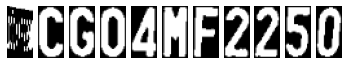

In [93]:
import matplotlib.pyplot as plt
for i in range(11):
    plt.subplot(1, 11, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [94]:
from keras.models import load_model

In [95]:
model=load_model("Number_Plate_Production_final.h5")

In [98]:
def fix_dimension(img): 
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img
    return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        predict_x=model.predict(img) 
        y=np.argmax(predict_x,axis=1)[0]
        character = dic[y] 
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

In [99]:
print(show_results())

QCG0JME2250


In [ ]:
'''
def find_contours_rectangle(processed_image):
    import numpy as np
    contours=cv2.findContours(processed_image,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[0]
    cntrs = sorted(contours, key=cv2.contourArea, reverse=True)
    proc=processed_image.copy()
    cnt=[]
    img_chars=[]
    
    for c in cntrs:
        (x,y,w,h)=cv2.boundingRect(c)
        if (w>=15 & w<=340)  and h >= (processed_image.shape[0]>>1)-15:
            
            x1=x+w
            y1=y+h
            cnt.append([x,y,x1,y1])
            cv2.rectangle(proc,(x,y),(x1,y1),(0,255,0),2)
            char_copy = np.zeros((44,24))
            
            char = proc[y:y1, x:x1]
            char = cv2.resize(char, (20, 40))

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            #char_copy[2:42, 2:22] = char
            img_chars.append(char)
    

    return img_chars, proc

'''

In [ ]:
'''
def find_contours_rectangle(processed_image):
    contours=cv2.findContours(processed_image,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[0]
    cntrs = sorted(contours, key=cv2.contourArea, reverse=True)
    proc=processed_image.copy()
    cnt=[]
    x_c=[]
    nh,wh=processed_image.shape
    images=[]
    for c in cntrs:
        (x, y, w, h) = cv2.boundingRect(c)

        #if h < 0.3 * nh:
         #   continue
            
        if (w>=15 & w<=340)  and h >= (processed_image.shape[0]>>1)-15:
            x_c.append(x)
            x1=x+w
            y1=y+h
            cnt.append([x,y,x1,y1])
            cv2.rectangle(proc, (x,y), (x1,y1), (0,255, 0), 1, cv2.LINE_AA)
            images.append(processed_image[y:y1,x:x1])
            
    return x_c

'''